

# Material de apoio


Leitura sugerida
1. An Introduction to Empirical Legal Research. Epstein & Martin. Capítulos 8 e 9, itens 9.0, 9.1, e 9.2. Pp. 173-192 e 193-211.
2. Statistical Thinking for the 21st Century. Poldrack. Capítulo 9. (Itens 9.3.5.2 a 9.3.5.4 são mais ténicos e podem ser pulados em uma primeira leitura)
Disponível em: https://statsthinking21.github.io/statsthinking21-core-site/hypothesis-testing.html

# Regressão linear

Vamos retomar os dados de onde paramos na apostila anterior.

Lembrando, já iremos partir de um dataframe em que calculamos a média para violação de cada elemento de interessa por caso criado para o experimento.

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
experimental_guide = pd.read_csv("https://bit.ly/study3-exp-guide")

cases = experimental_guide.groupby("case", as_index=False)[["text", "moral", "rule_violation"]].mean()
cases.columns = ["cases", "text", "moral", "rule_violation"]
cases.head()

,cases,text,moral,rule_violation
0,acc1,2.000000,3.222222,3.583333
1,acc3,6.916667,6.500000,7.000000
2,acc4,1.454545,1.272727,1.333333
3,alice2,5.785714,1.000000,1.818182
4,alice3,4.666667,4.000000,3.000000


Terminamos a aula passando pelo texte de correlação. Aqui, medimos como duas variáveis variam em conjunto. A correlação é uma medida direção e intensidade da relação linear entre duas variáveis.

Esse fato tem três características importantes:

1. Essa variação é medida por uma relação linear! Ou seja, podemos descrevê-la com uma linha reta que sempre varia na mesma proporção e na mesma direção.
2. A direção se refere a como duas variáveis variam juntas. Se uma variável aumenta enquanto a outra diminui, a correlação é negativa. Se ambas aumentam ou diminuem juntas, a correlação é positiva.
3. **Intensidade** se refere a quão fortemente as duas variáveis estão relacionadas. A correlação varia de -1 a 1. Quanto mais próximo do valor máximo, mais perto a variação conjunta é de uma linha reta.

Isso tem certas limitações. Por exemplo, o fato de que talvezx nem todas as relações tenham a característica de ser bem descrita por uma linha reta. Pense, por exemplo, o efeito que renda adicional terá sobre seu tratamento de saúde. Com certeza, ter uma renda de R$ 110.0000,00 por mês proporcionará acesso a saúde muito maior para uma família do que R$ 10.000,00. Mas parece razoável supor que aumentar essa renda na mesma quantidade para R$ 210.000,00 não terá o mesmo efeito.

Além disso, a correlação não mede a inclinação da reta. Ou seja, se alterarmos o valor de uma variável em uma unidade, a correlação não nos diz quanto a outra variável deve mudar.

Vamos voltar ao nosso exemplo. 


Como podemos visualizar uma relação linear? O gráfico de disperção é uma boa ferramente, mas se queremos estudar a correlação, como acabamos de descrever, faz mais sentido traçar uma linha pelo gráfico.


Assim, uma tendência que não é imediatamente óbvia em um **scatterplot**:

<AxesSubplot: xlabel='text', ylabel='rule_violation'>

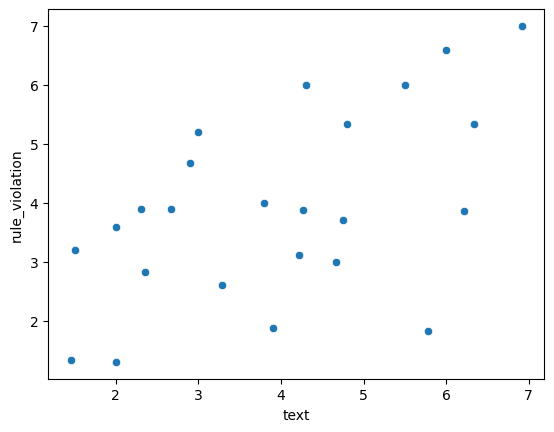

In [ ]:
sns.scatterplot(x="text", y="rule_violation", data=cases)

...se torna óbvia em um regplot.

<AxesSubplot: xlabel='text', ylabel='rule_violation'>

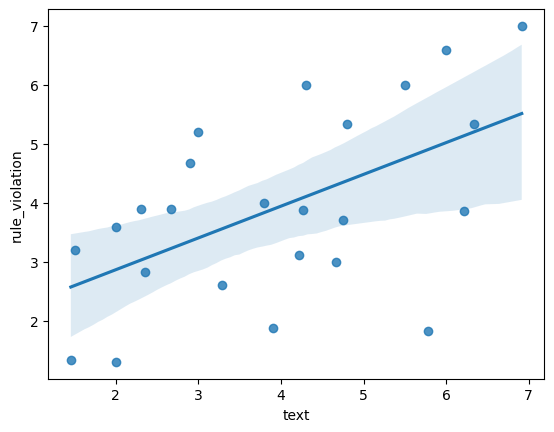

In [4]:
sns.regplot(x="text", y="rule_violation", data=cases)

Mas como decidimos onde traçar a linha? Nós temos alguma noção intuitiva do que fazer, mas, como sempre, podemos usar a estatística para dar uma resposta precisa a essa pergunta.

Uma **regressão linear simples** faz exatamente isso: ela estima qual é a melhor linha para representar uma relação linear entre **duas variáveis**. 

A implementação mais comum da regressão linear simples minimiza o quadrado do erro de cada um dos pontos observados. Em outras palavras: ela acha a linha que retorna a menor soma de erros (diferença entre o valor previsto pelo Y da linha e o valor real) ao quadrado possível. Isso é muito parecido com calcular a variância da diferença entre o valor previsto e o valor real!

A célula abaixo monta uma regressão linear simples entre a violação da regra (variável dependente) e violação do texto (variável independente).

In [18]:
from statsmodels.formula.api import ols

#DV está no eixo Y do nosso gráfico
#IV está no eixo X do nosso gráfico

#define o modelo
modelo_texto = ols("rule_violation ~ text", data=cases).fit()

#imprimindo os resultados do modelo
modelo_texto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         rule_violation   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     9.489
Date:                Tue, 03 May 2022   Prob (F-statistic):            0.00547
Time:                        17:16:24   Log-Likelihood:                -40.500
No. Observations:                  24   AIC:                             85.00
Df Residuals:                      22   BIC:                             87.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7872      0.746      2.396      0.026       0.240       3.334
text           0.5388      0.175      3.080      0.005       0.176       0.902
==============================================================================
Omnibus:                        1.261   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                1.170
Skew:                          -0.430   Prob(JB):                        0.557
Kurtosis:                       2.343   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O coeficiente de regressão, 0.5388, no caso acima, nos dá uma métrica do tamanho do efeito que pode ser comparada entre variáveis diferentes. 

Assim, podemos construir um modelo com a variável 'moral' como IV e comparar a magnitude do efeito das duas coisas.

## Sintaxe para criar regressões

Utilizamos a função `ols` do pacote `statsmodels.formula.api` para *criar nossa regressão*. Essa biblioteca permite criar os modelos a partir de fórmulas determinadas por strings, semelhante ao que fazemos com o `query` em alguma medida.

Utilizamos o argumento da função `data` para *informar o dataframe com os dados que serão utilizados* para criar e estimar o modelo. 

Para a fórmula temos uma sintaxe simples: começamos com o *nome da coluna que queremos prever*, seguido de um *til (~)*  e a *variável que queremos usar para prevê-la*.

Na notação matemática o `~` significa aproximado, e indica que queremos estimar, ou aproximar, a variável antes dele a partir da variável seguinte.

O pacote usado já inclui automaticamente o Intercepto (coeficiente linear como aprendemos em Matemática Básica), mas poderíamos ter usado explicitamente a fórmula `"rule_violation ~ 1 + text"` para representá-lo. Isso é basicamente o mesmo com a fórmula de uma linha que conhecemos:

$ Y = mX + n $

Reordenada como:

$ Y = (n +) mX $ 

Omitindo a expressão entre parêntese.

Como veremos abaixo, poderíamos usar ainda mais variáveis em nossa regressão, para isso basta incluir na fórmula a adição de novas colunas com o sinal de `+` e o nome da coluna!



## Desafio

Construir o modelo alternativo que descreve a violação da norma a partir da violação do propósito (coluna moral).

Tente também explicar o resultado em palavras para praticar a interpretação do resultado.

In [ ]:
# código aqui
modelo_proposito = 

## Mais sobre regressões lineares

A formula que determina uma linha em um plano bidimensional é a seguinte:

$ DVi = bIV + c $

A regressão estima *quais valores de b e c minimizam o quadrado dos erros*. 

O **valor c** é uma constante que indica *em qual ponto do eixo Y a linha começa*, enquanto o **valor b** indica qual é o *grau de inclinação da linha*. Esse valor é justamente o **coeficiente de regressão** que usamos para responder à pergunta da pesquisa. [Esse site](https://setosa.io/ev/ordinary-least-squares-regression/) possui uma excelente ferramenta para entendermos como isso funciona.

**Um outro valor extremamente importante é o R²**. Ele define qual é o *percentual da variação na variável dependente que é explicado pela variação na variável independente*. Isso é bastante útil! Usando o R² podemos saber até que ponto nossos modelos têm um poder explicativo adequado.


OBS: Para os interessados na matemática, recomendo [esse vídeo](https://www.youtube.com/watch?v=lng4ZgConCM) e toda a série a qual ele pertence.

## Prevendo os valores de novas observações

Uma vantagem das regressões lineares é que elas nos permitem fazer boas previsões a respeito do que acontece em dados não observados. Por exemplo, se uma situação recebe o rating médio de violação do texto em 6.3, qual deve ser o valor esperado do rating de violação da regra? Podemos inferir isso usando a formula das regressões lineares. Depois que já encontramos a linha que minimiza o quadrado dos erros, basta adicionar o valor da IV (6.3) na equação para chegar ao resultado. Fazemos isso no Python usando o método de modelos do scipy `.predict()`:

In [ ]:
modelo_texto.predict({'text' : 6.3})

0    5.181647
dtype: float64

# Regressões múltiplas

As regressões possuem uma outra vantagem: podemos criar *modelos que contam com múltiplas variáveis independentes*. 

Nesse caso, temos dados que variam em múltiplas dimensões e se torna cada vez mais difícil de representar a relação entre as variáveis de forma visual. A vantagem de usar regressões múltiplas é que sabemos se o efeito de uma variável continua existindo quando levamos em conta a outra variável.

Teoricamente, queremos avaliar agora a ideia de que a violação da regra é explicada tanto pela violação do texto quanto pela violação do propósito.

Assim, podemos colocar tanto texto quanto moral como preditores (ou variáveis independentes) de julgamentos sobre violação da regra:

In [ ]:
cases.head(3)

,cases,text,moral,rule_violation
0,acc1,2.000000,3.222222,3.583333
1,acc3,6.916667,6.500000,7.000000
2,acc4,1.454545,1.272727,1.333333


In [27]:
# definindo regressao, agora com 2 variáveis dependentes
regressao_multipla = ols("rule_violation ~ moral + text", data=cases).fit()

In [28]:
# exibindo resultado
regressao_multipla.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         rule_violation   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     11.71
Date:                Tue, 03 May 2022   Prob (F-statistic):           0.000383
Time:                        17:23:47   Log-Likelihood:                -35.811
No. Observations:                  24   AIC:                             77.62
Df Residuals:                      21   BIC:                             81.16
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7816      0.704      1.111      0.279      -0.682       2.245
moral          0.4510      0.142      3.168      0.005       0.155       0.747
text           0.4049      0.153      2.643      0.015       0.086       0.724
==============================================================================
Omnibus:                        2.168   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.338   Jarque-Bera (JB):                1.117
Skew:                           0.024   Prob(JB):                        0.572
Kurtosis:                       1.944   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nessas condições, podemos ver que o R² do modelo é maior quando incluímos as duas variáveis do que quando incluíamos cada uma delas em separado. Isso indica que as duas variáveis são importantes para entendermos o conceito ordinário de regra, o que faz parte do argumento desenvolvido no paper referenciado.

## Prevendo novos casos

Assim como no caso de uma só variável, podemos usar essa regressão para prever novos casos da mesma forma.

In [ ]:
novos_dados = pd.DataFrame(
    columns=["moral", "text"],
    data=[(0.2,6.5), (4.2, 4.4), (6.3, 6.6)]
)

novos_dados

,moral,text
0,0.2,6.5
1,4.2,4.4
2,6.3,6.6


In [ ]:
regressao_multipla.predict(novos_dados)

0    3.503876
1    4.457542
2    6.295515
dtype: float64